In [2]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.getcwd()

'd:\\Alberto\\ML_DS\\ML_DS\\MASTER EN CIENCIA DE DATOS\\Semestre4\\TFM\\notebooks'

In [28]:
baseline_lr_metrics = pd.read_csv("../experiments_metrics/baseline_logistic_regression_cleanv3.csv").drop("Unnamed: 0", axis=1)
baseline_rf_metrics = pd.read_csv("../experiments_metrics/baseline_random_forest_cleanv3.csv").drop("Unnamed: 0", axis=1)
baseline_lgbm_metrics = pd.read_csv("../experiments_metrics/baseline_lightgbm_cleanv3.csv").drop("Unnamed: 0", axis=1)
ftu_lr_metrics = pd.read_csv("../experiments_metrics/ftu_logistic_regression_cleanv3.csv").drop("Unnamed: 0", axis=1)
ftu_rf_metrics = pd.read_csv("../experiments_metrics/ftu_random_forest_cleanv3.csv").drop("Unnamed: 0", axis=1)
ftu_lgbm_metrics = pd.read_csv("../experiments_metrics/ftu_lightgbm_cleanv3.csv").drop("Unnamed: 0", axis=1)
prejudice_remover_metrics = pd.read_csv("../experiments_metrics/prejudice_remover_cleanv3.csv").drop("Unnamed: 0", axis=1)
reweight_lr_metrics = pd.read_csv("../experiments_metrics/reweight_logistic_regression_cleanv3.csv").drop("Unnamed: 0", axis=1)
reweight_rf_metrics = pd.read_csv("../experiments_metrics/reweight_random_forest_cleanv3.csv").drop("Unnamed: 0", axis=1)
reweight_lightgbm_metrics = pd.read_csv("../experiments_metrics/reweight_lightgbm_cleanv3.csv").drop("Unnamed: 0", axis=1)

baseline_lr_metrics["Approach"] = "Baseline Logistic Regression"
baseline_rf_metrics["Approach"] = "Baseline Random Forest"
baseline_lgbm_metrics["Approach"] = "Baseline LightGBM"
ftu_lr_metrics["Approach"] = "FTU + Logistic Regression"
ftu_rf_metrics["Approach"] = "FTU + Random Forest"
ftu_lgbm_metrics["Approach"] = "FTU + LightGBM"
prejudice_remover_metrics["Approach"] = "Prejudice Remover"
reweight_lr_metrics["Approach"] = "Reweighting + Logistic Regression"
reweight_rf_metrics["Approach"] = "Reweighting + Random Forest"
reweight_lightgbm_metrics["Approach"] = "Reweighting + LightGBM"

baseline_metrics = pd.concat([
    baseline_lr_metrics,
    baseline_rf_metrics,
    baseline_lgbm_metrics])

ftu_metrics = pd.concat([
    ftu_lr_metrics,
    ftu_rf_metrics,
    ftu_lgbm_metrics])

reweight_metrics = pd.concat([
    reweight_lr_metrics,
    reweight_rf_metrics,
    reweight_lightgbm_metrics
])

caucasian_cols1 = [col for col in baseline_metrics.columns if "Caucassian" in col]
caucasian_cols2 = [col for col in baseline_metrics.columns if "Caucasian" in col]

baseline_metrics = baseline_metrics.drop(caucasian_cols1, axis=1).drop(caucasian_cols2, axis=1)
ftu_metrics = ftu_metrics.drop(caucasian_cols1, axis=1).drop(caucasian_cols2, axis=1)
reweight_metrics = reweight_metrics.drop(caucasian_cols1, axis=1).drop(caucasian_cols2, axis=1)
prejudice_remover_metrics = prejudice_remover_metrics.drop(caucasian_cols1, axis=1).drop(caucasian_cols2, axis=1)

In [76]:
reweight_metrics.describe()

,accuracy,roc_auc,f1,fpr_AfricanAmerican,fprd_AfricanAmerican,fpr_Asian,fprd_Asian,fpr_Hispanic,fprd_Hispanic,fpr_NativeAmerican,...,fnr_AfricanAmerican,fnrd_AfricanAmerican,fnr_Asian,fnrd_Asian,fnr_Hispanic,fnrd_Hispanic,fnr_NativeAmerican,fnrd_NativeAmerican,fnr_Other,fnrd_Other
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.820619,0.653938,0.462733,0.071005,1.452028,0.039578,0.797131,0.064363,1.311576,0.056414,...,0.627531,0.985355,0.777509,1.222531,0.624806,0.978504,0.642404,1.011039,0.658742,1.033782
std,0.006115,0.022866,0.043885,0.007254,0.074230,0.008842,0.079564,0.008297,0.054241,0.007815,...,0.044923,0.016967,0.043807,0.040579,0.064933,0.022835,0.037353,0.056969,0.053476,0.021513
min,0.813133,0.628885,0.413186,0.064444,1.355545,0.028916,0.671111,0.054651,1.240548,0.046699,...,0.545156,0.960647,0.682156,1.163095,0.524537,0.946211,0.564626,0.930094,0.578976,1.000649
25%,0.813272,0.629236,0.413940,0.066199,1.391669,0.030422,0.704506,0.055964,1.262803,0.049919,...,0.577723,0.964720,0.732807,1.177369,0.550282,0.962191,0.615646,0.941814,0.607045,1.011571
50%,0.820912,0.650453,0.458157,0.066832,1.440240,0.037952,0.818943,0.062796,1.293048,0.054750,...,0.643815,0.991875,0.798327,1.223088,0.625905,0.968004,0.649660,1.028409,0.653550,1.038340
75%,0.827111,0.679665,0.512286,0.078264,1.537414,0.047892,0.868441,0.072451,1.358069,0.062802,...,0.668035,0.996163,0.814126,1.259857,0.698914,1.006315,0.667517,1.058795,0.721657,1.047456
max,0.830190,0.693418,0.535399,0.085015,1.561756,0.053614,0.928326,0.079086,1.409981,0.070853,...,0.671866,1.011531,0.821561,1.283461,0.706356,1.016586,0.707483,1.106263,0.727023,1.066781


In [85]:
df = prejudice_remover_metrics.melt(id_vars="Approach")

is_performance = (df["variable"]=="accuracy") | (df["variable"]=="roc_auc") | (df["variable"]=="f1")
performance_metrics = df[is_performance]
fairness_metrics = df[~is_performance]
fairness_metrics

,Approach,variable,value
30,Prejudice Remover,fpr_AfricanAmerican,0.067564
31,Prejudice Remover,fpr_AfricanAmerican,0.067369
32,Prejudice Remover,fpr_AfricanAmerican,0.067076
33,Prejudice Remover,fpr_AfricanAmerican,0.067076
34,Prejudice Remover,fpr_AfricanAmerican,0.067174
...,...,...,...
225,Prejudice Remover,fnrd_Other,0.976589
226,Prejudice Remover,fnrd_Other,0.975647
227,Prejudice Remover,fnrd_Other,0.986235
228,Prejudice Remover,fnrd_Other,0.969957


In [86]:
fairness_metrics[["metric", "group"]] = fairness_metrics["variable"].str.split("_", expand=True)
fairness_metrics = fairness_metrics[fairness_metrics["metric"].str.endswith('d')]
fairness_metrics

C:\Users\34618\AppData\Local\Temp\ipykernel_19672\4144882487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fairness_metrics[["metric", "group"]] = fairness_metrics["variable"].str.split("_", expand=True)
C:\Users\34618\AppData\Local\Temp\ipykernel_19672\4144882487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fairness_metrics[["metric", "group"]] = fairness_metrics["variable"].str.split("_", expand=True)


,Approach,variable,value,metric,group
40,Prejudice Remover,fprd_AfricanAmerican,1.569474,fprd,AfricanAmerican
41,Prejudice Remover,fprd_AfricanAmerican,1.569523,fprd,AfricanAmerican
42,Prejudice Remover,fprd_AfricanAmerican,1.563624,fprd,AfricanAmerican
43,Prejudice Remover,fprd_AfricanAmerican,1.563624,fprd,AfricanAmerican
44,Prejudice Remover,fprd_AfricanAmerican,1.557235,fprd,AfricanAmerican
...,...,...,...,...,...
225,Prejudice Remover,fnrd_Other,0.976589,fnrd,Other
226,Prejudice Remover,fnrd_Other,0.975647,fnrd,Other
227,Prejudice Remover,fnrd_Other,0.986235,fnrd,Other
228,Prejudice Remover,fnrd_Other,0.969957,fnrd,Other


In [87]:
fairness_metrics[" "] = " "
fp = fairness_metrics[fairness_metrics["metric"]=="fprd"]
fn = fairness_metrics[fairness_metrics["metric"]=="fnrd"]

C:\Users\34618\AppData\Local\Temp\ipykernel_19672\2413809015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fairness_metrics[" "] = " "


d:\Alberto\ML_DS\ML_DS\MASTER EN CIENCIA DE DATOS\Semestre4\TFM\tfm-env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


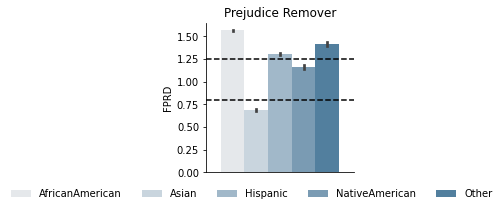

In [93]:
pal = {"AfricanAmerican":"#e4e8ec", "Asian":"#C6D5E1", "Hispanic":"#9BB9CF", "NativeAmerican":"#709DBC", "Other":"#4682AA"}

g = sns.catplot(
    x=" ",
    y="value",
    hue="group",
    kind="bar",
    data=fp,
    col="Approach",
    size=3,
    palette=pal
)

g.refline(y=0.8, color="black")
g.refline(y=1.25, color="black")

axes = g.axes.flatten()
axes[0].set_title("Prejudice Remover")
axes[0].set_ylabel("FPRD")
#axes[1].set_title("Reweighting + Random Forest")
#axes[2].set_title("Reweighting + LightGBM")

g.set(xticks=[])
g._legend.remove()

plt.legend(bbox_to_anchor=(2, -0.05), ncol=5, frameon=False)#,bbox_to_anchor=(1,0.5))
plt.savefig("../plots/fp_prejudice.png", dpi=300)

d:\Alberto\ML_DS\ML_DS\MASTER EN CIENCIA DE DATOS\Semestre4\TFM\tfm-env\lib\site-packages\seaborn\categorical.py:3750: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


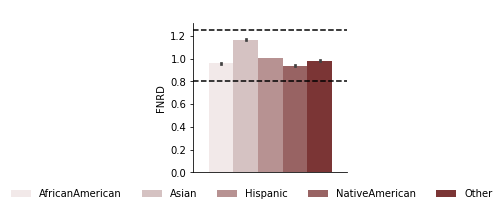

In [92]:
pal = {"AfricanAmerican":"#f3e7e7", "Asian":"#D8BFBF", "Hispanic":"#BD8C8C", "NativeAmerican":"#A15A5A", "Other":"#872929"}

g = sns.catplot(
    x=" ",
    y="value",
    hue="group",
    kind="bar",
    data=fn,
    col="Approach",
    size=3,
    palette=pal
)

g.refline(y=0.8, color="black")
g.refline(y=1.25, color="black")

axes = g.axes.flatten()
axes[0].set_title(" ")
axes[0].set_ylabel("FNRD")
#axes[1].set_title(" ")
#axes[2].set_title(" ")

g.set(xticks=[])
g._legend.remove()

plt.legend(bbox_to_anchor=(2, -0.05), ncol=5, frameon=False)#,bbox_to_anchor=(1,0.5))
plt.savefig("../plots/fn_prejudice.png", dpi=300)


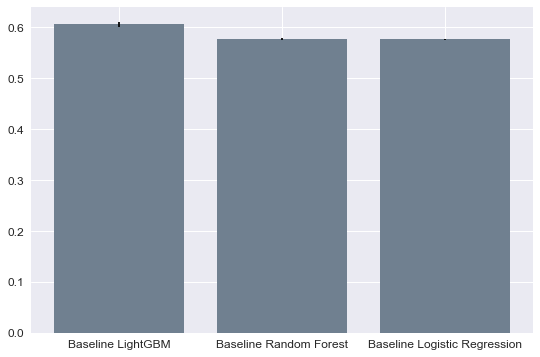

In [140]:
fig, ax = plt.subplots(figsize=(9, 6))
ax.bar(baseline_f1["Approach"], baseline_f1["mean"], yerr=baseline_f1["std"], align='center', ecolor='black', color="slategray")

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)

sns.despine()
plt.show()

In [122]:
baseline_f1

,Approach,variable,mean,std
2,Baseline LightGBM,f1,0.605773,0.004351
2,Baseline Random Forest,f1,0.576670,0.002382
2,Baseline Logistic Regression,f1,0.576133,0.000381
